# Utilizar Método de Newton para clasificar puntos de equilibrio
Pablo Zamora, Erick Guerra, Diego Morales Aquino

In [190]:
import numpy as np
from scipy.optimize import approx_fprime
import matplotlib.pyplot as plt

In [191]:
def calc_derivadas_parciales(f, x0):
    grad = np.zeros(len(x0))
    for i in range(len(x0)):
        grad[i] = approx_fprime(x0, lambda x: f(x))[i]
    return grad

In [192]:
def newton(F, x0, max_iter, tol):
    eigenvalue = 0
    for i in range(max_iter):
        F_x0 = np.array([f(x0) for f in F])
        dF_x0 = np.array([calc_derivadas_parciales(f, x0) for f in F])
        
        try:
            dF_x0_inv = np.linalg.inv(dF_x0)
        except np.linalg.LinAlgError:
          continue

        x0 = x0 - np.matmul(dF_x0_inv, F_x0)
        F_x0 = np.array([f(x0) for f in F])

        # Condición de parada de tolerancia
        if np.linalg.norm(F_x0, ord=2) < tol:
          eigenvalue = np.linalg.eigvals(dF_x0)
          break

    return x0, eigenvalue

In [193]:
F = [
    lambda x: 4*x[0] - 3*x[1] + 7*x[0]*x[1],
    lambda x: 4*x[0] + 2*x[1] + 2*(x[0]**2) - 3*(x[1]**2)
]

def find_zeros(F, initial_points, maxIter=100, tol=1e-10):
  zeros = []
  for x0 in initial_points:
      zero, eigenvalue = newton(F, x0, maxIter, tol)
      zeros.append([zero, eigenvalue])
  return zeros

# Generar puntos iniciales (pueden ajustarse según el problema)
initial_points = [
    np.array([0.1, 0.1]),
    np.array([-1 - 0.j, -1 - 0.j], dtype=np.complex128),
    np.array([0.1 + 0.j, 1 - 0.j], dtype=np.complex128),
    np.array([1 - 0.j, -1 + 0.j], dtype=np.complex128),
]

zeros = find_zeros(F, initial_points)

for z in zeros:
  
  v1, v2 = z[1]
  
  if isinstance(v1, complex):
    if v1.real > 0:
      tag = "Espiral repulsor"
    elif v1.real < 0:
      tag = "Espiral atractor"
    else:
      tag = "Centro"
  else:
    if v1 > 0 and v2 > 0:
      if v1 == v2:
        tag="Twist repulsor"
      else:
        tag = "Nodo repulsor"
    elif v1 < 0 and v2 < 0:
      if v1 == v2:
        tag="Twist atractor"
      else:
        tag = "Nodo atractor"
    else:
      tag = "Punto silla"
  print(f"Punto crítico: {z[0]}")
  print(f"Eigenvalores: {z[1]}")
  print(f"Clasificación: {tag}\n")
  

Punto crítico: [-1.55181677e-16  1.86246989e-15]
Eigenvalores: [2.99999997+3.31662476j 2.99999997-3.31662476j]
Clasificación: Espiral repulsor

Punto crítico: [-2.35424307+0.j -0.48342488+0.j]
Eigenvalores: [-7.73504788 13.25162333]
Clasificación: Punto silla

Punto crítico: [0.27888449+0.j 1.06463911+0.j]
Eigenvalores: [11.1065349  -4.04189587]
Clasificación: Punto silla

Punto crítico: [ 0.93250143+0.j -1.05740471+0.j]
Eigenvalores: [-5.38754047 10.33013572]
Clasificación: Punto silla



c:\Python312\Lib\site-packages\scipy\optimize\_optimize.py:1005: ComplexWarning: Casting complex values to real discards the imaginary part
  xk = np.asarray(xk, float)


In [194]:
import numpy as np
import matplotlib.pyplot as plt

def graficar_campo_direcciones(F, xmin, xmax, ymin, ymax, xstep, ystep, unitario=True, graficar_flujo=True, punto_flujo=None, puntos=None):
    x = np.linspace(xmin, xmax, xstep)
    y = np.linspace(ymin, ymax, ystep)

    X, Y = np.meshgrid(x, y)
    U, V = np.zeros(X.shape), np.zeros(Y.shape)
    
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            U[i, j], V[i, j] = F(X[i, j], Y[i, j])

    if unitario:
        M = np.hypot(U, V)
        U, V = U / M, V / M

    plt.quiver(X, Y, U, V, color='purple', angles='xy')
    plt.title('Campo vectorial')
    plt.xlabel('x')
    plt.ylabel('y')

    if graficar_flujo and punto_flujo:
        x_seed, y_seed = punto_flujo
        plt.streamplot(X, Y, U, V, color='blue', start_points=np.array([[x_seed, y_seed]]))
    elif graficar_flujo:
        plt.streamplot(X, Y, U, V, color='blue')

    if puntos is not None:
        puntos = np.array(puntos)
        plt.scatter(puntos[:, 0], puntos[:, 1], color='red', marker='x', label='Puntos')
        plt.legend()

    plt.show()


c:\Python312\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Python312\Lib\site-packages\matplotlib\collections.py:194: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


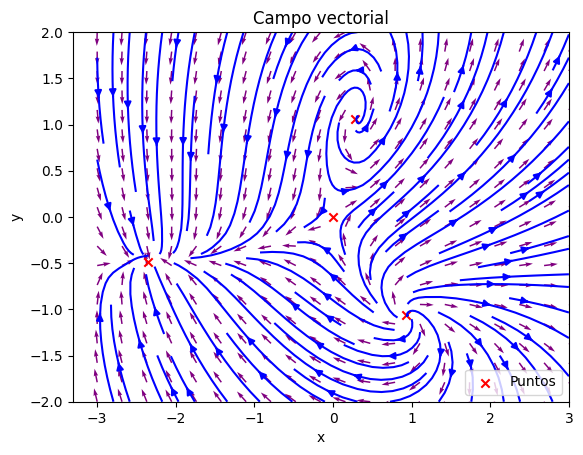

In [195]:
puntos = [tuple(z[0]) for z in zeros]

# Función auxiliar que define el campo vectorial
def F(x, y):
    u = 4*x + 2*y + 2*x**2 - 3*y**2
    v = 4*x - 3*y + 7*x*y
    return u, v

graficar_campo_direcciones(F, xmin=-3, xmax=3, ymin=-2, ymax=2, xstep=20, ystep=20, unitario=True, graficar_flujo=True, puntos=puntos)

In [196]:
F = [
    lambda x: -18 + 6*x[0] + 2*x[1] - x[0]*x[1],
    lambda x: 33 - 10*x[0] - 3*x[1] + x[0]**2
]

def find_zeros(F, initial_points, maxIter=100, tol=1e-7):
  zeros = []
  for x0 in initial_points:
      zero, eigenvalue = newton(F, x0, maxIter, tol)
      zeros.append([zero, eigenvalue])
  return zeros

# Generar puntos iniciales (pueden ajustarse según el problema)
initial_points = [
    np.array([0, 0]),
    np.array([10, 10]),
    np.array([0, 10]),
]

zeros = find_zeros(F, initial_points)

for z in zeros:
  
  v1, v2 = z[1]
  
  if isinstance(v1, complex):
    if v1.real > 0:
      tag = "Espiral repulsor"
    elif v1.real < 0:
      tag = "Espiral atractor"
    else:
      tag = "Centro"
  else:
    if v1 > 0 and v2 > 0:
      if v1 == v2:
        tag="Twist repulsor"
      else:
        tag = "Nodo repulsor"
    elif v1 < 0 and v2 < 0:
      if v1 == v2:
        tag="Twist atractor"
      else:
        tag = "Nodo atractor"
    else:
      tag = "Punto silla"
  print(f"Punto crítico: {z[0]}")
  print(f"Eigenvalores: {z[1]}")
  print(f"Clasificación: {tag}\n")
  

Punto crítico: [4. 3.]
Eigenvalores: [ 3.60555832 -3.60556499]
Clasificación: Punto silla

Punto crítico: [7.60555128 4.92963248]
Eigenvalores: [-0.96482325+5.00694852j -0.96482325-5.00694852j]
Clasificación: Espiral atractor

Punto crítico: [0.39444872 9.73703418]
Eigenvalores: [-3.36853449+3.8280188j -3.36853449-3.8280188j]
Clasificación: Espiral atractor



In [197]:
import numpy as np
import matplotlib.pyplot as plt

def graficar_campo_direcciones(F, xmin, xmax, ymin, ymax, xstep, ystep, unitario=True, graficar_flujo=True, punto_flujo=None, puntos=None):
    x = np.linspace(xmin, xmax, xstep)
    y = np.linspace(ymin, ymax, ystep)

    X, Y = np.meshgrid(x, y)
    U, V = np.zeros(X.shape), np.zeros(Y.shape)
    
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            U[i, j], V[i, j] = F(X[i, j], Y[i, j])

    if unitario:
        M = np.hypot(U, V)
        U, V = U / M, V / M

    plt.quiver(X, Y, U, V, color='purple', angles='xy')
    plt.title('Campo vectorial')
    plt.xlabel('x')
    plt.ylabel('y')

    if graficar_flujo and punto_flujo:
        x_seed, y_seed = punto_flujo
        plt.streamplot(X, Y, U, V, color='blue', start_points=np.array([[x_seed, y_seed]]))
    elif graficar_flujo:
        plt.streamplot(X, Y, U, V, color='blue')

    if puntos is not None:
        puntos = np.array(puntos)
        plt.scatter(puntos[:, 0], puntos[:, 1], color='red', marker='x', label='Puntos')
        plt.legend()

    plt.show()


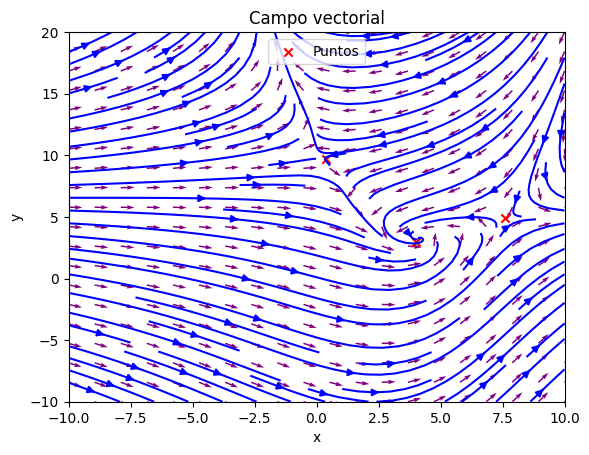

In [198]:
puntos = [tuple(z[0]) for z in zeros]

# Función auxiliar que define el campo vectorial
def F(x, y):
    u = 33 - 10*x - 3*y + x**2
    v = -18 + 6*x + 2*y - x*y
    return u, v

graficar_campo_direcciones(F, xmin=-10, xmax=10, ymin=-10, ymax=20, xstep=20, ystep=20, unitario=True, graficar_flujo=True, puntos=puntos)